# ML Regression Forrest Fire Prediction

## Part 2: EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df0 = pd.read_csv('algerian-forest-fire-dataset_cleaned.csv')
df = df0.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    int64  
 5   ws           243 non-null    int64  
 6   rain         243 non-null    float64
 7   ffmc         243 non-null    float64
 8   dmc          243 non-null    float64
 9   dc           243 non-null    float64
 10  isi          243 non-null    float64
 11  bui          243 non-null    float64
 12  fwi          243 non-null    float64
 13  classes      243 non-null    int64  
 14  region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [4]:
df

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [5]:
df['classes'].value_counts()

classes
1    137
0    106
Name: count, dtype: int64

In [6]:
classes_pct = df['classes'].value_counts(normalize=True) * 100

In [21]:
classes_labels = ['Fire','Not Fire']

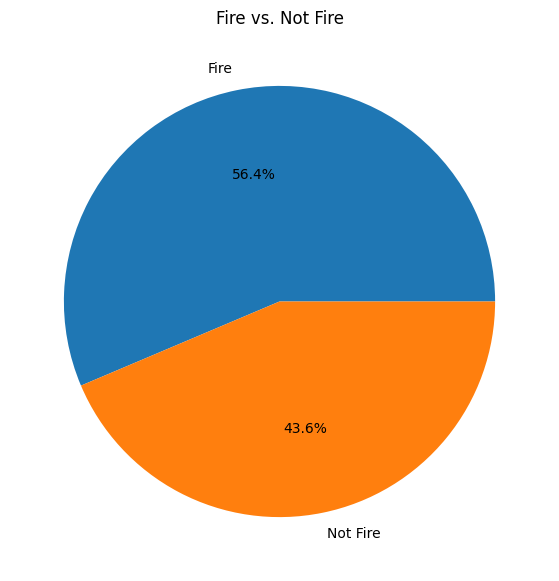

In [22]:
# Pie Chart: Fire vs. Not Fire

plt.figure(figsize=(12,7))
plt.pie(classes_pct,labels=classes_labels,autopct='%1.1f%%')
plt.title('Fire vs. Not Fire')

plt.show();

<Axes: ylabel='fwi'>

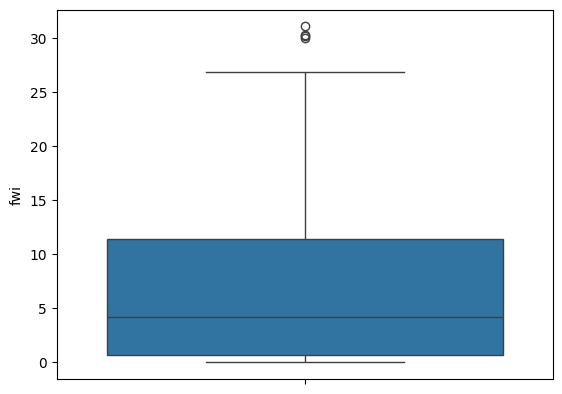

In [23]:
sns.boxplot(df['fwi'])

Text(0.5, 1.0, 'Fire Analysis of Sidi Bel Region')

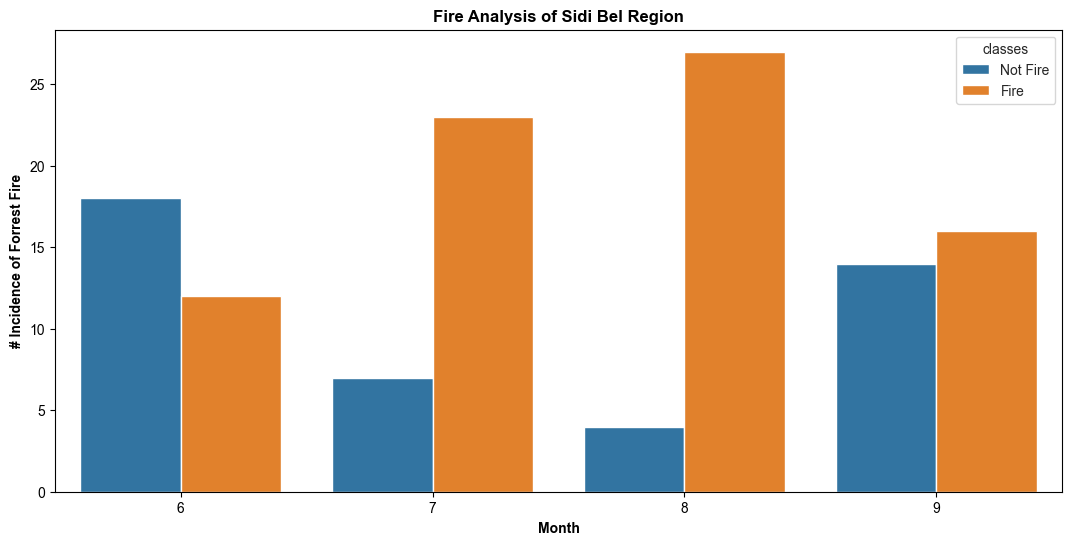

In [27]:
# Monthly Fire analysis

region1 = df.loc[df['region']== 1]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')
ax = sns.countplot(x='month',hue='classes',data=region1)

plt.xlabel('Month', weight='bold')
plt.ylabel('# Incidence of Forrest Fire', weight='bold')

# Define custom labels
custom_labels = ['Not Fire', 'Fire']

# Get current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Set the new legend labels
ax.legend(handles=handles, labels=custom_labels, title='classes')

plt.title('Fire Analysis of Sidi Bel Region', weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Region')

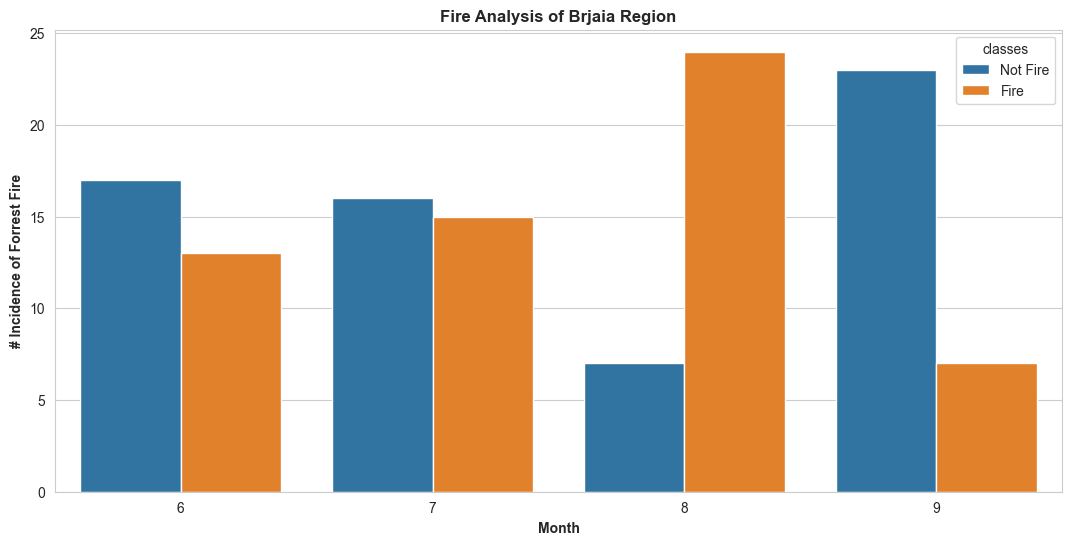

In [28]:
# Monthly Fire analysis

region0 = df.loc[df['region']== 0]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')
ax = sns.countplot(x='month',hue='classes',data=region0)

plt.xlabel('Month', weight='bold')
plt.ylabel('# Incidence of Forrest Fire', weight='bold')

# Define custom labels
custom_labels = ['Not Fire', 'Fire']

# Get current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Set the new legend labels
ax.legend(handles=handles, labels=custom_labels, title='classes')

plt.title('Fire Analysis of Brjaia Region', weight='bold')

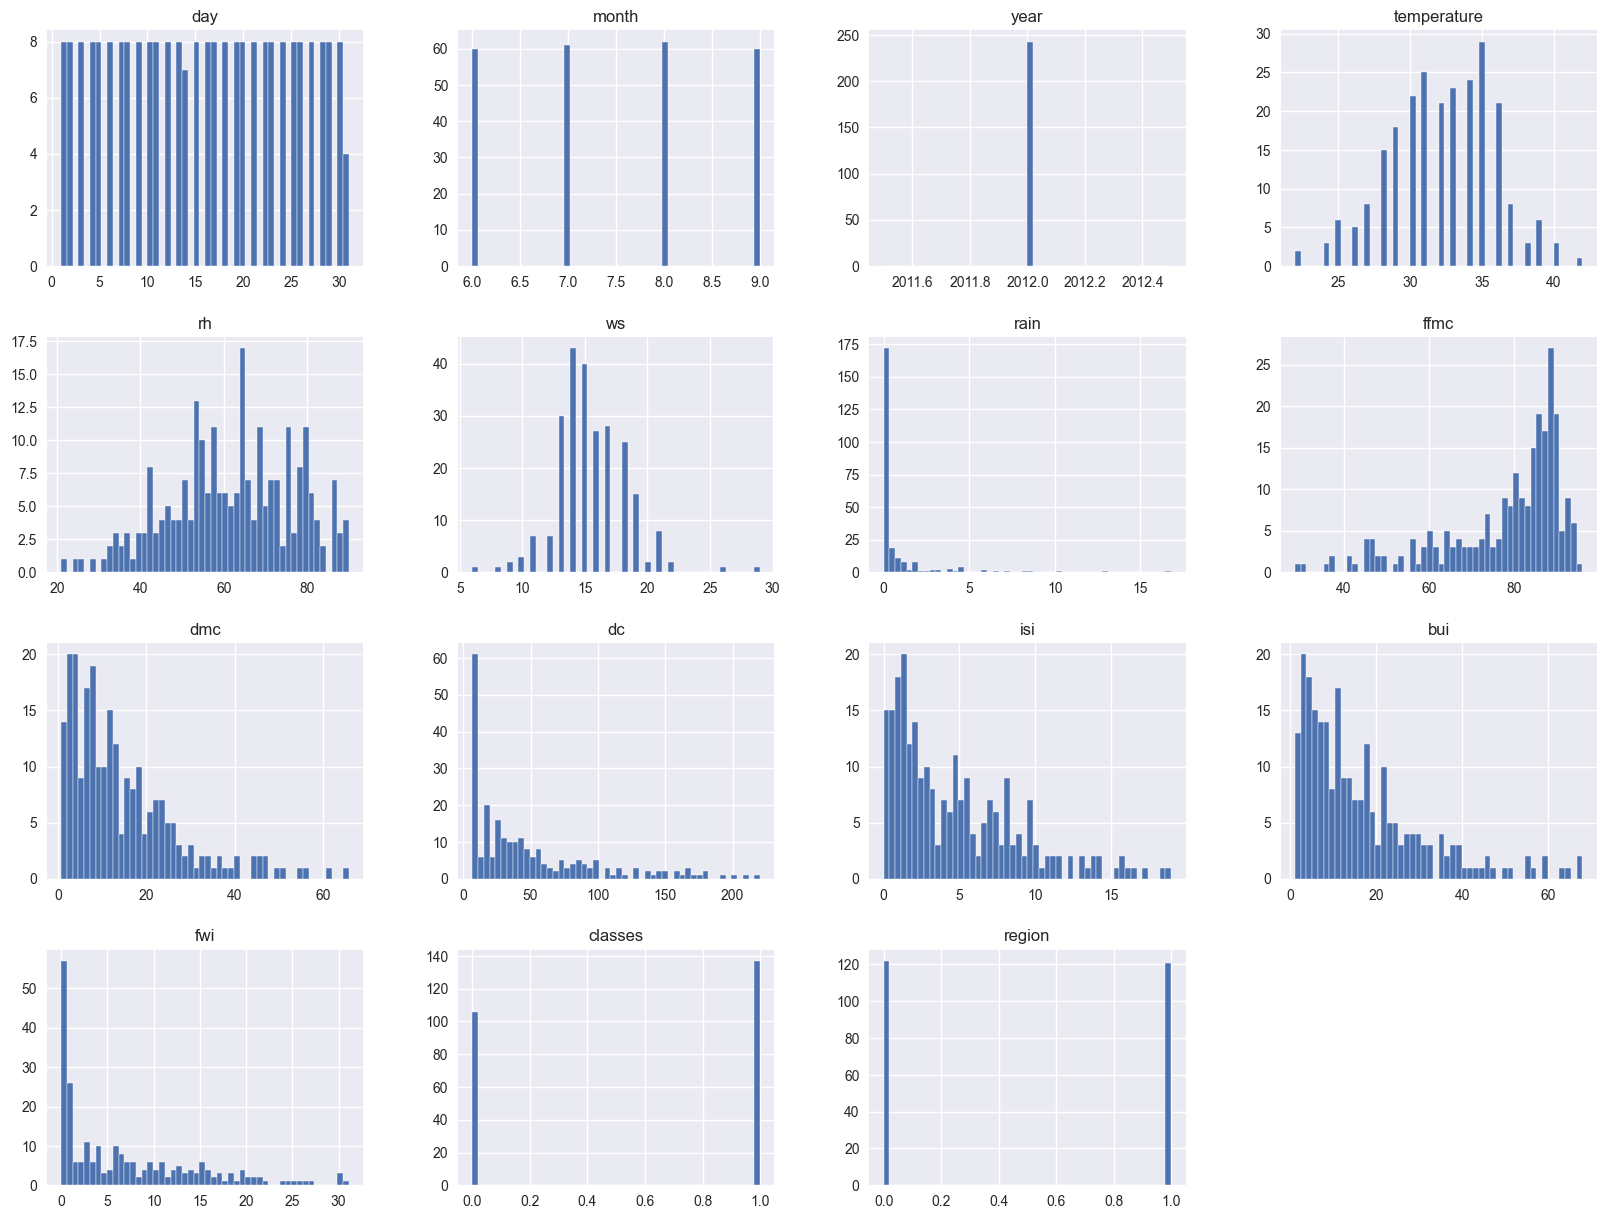

In [30]:
plt.style.use('seaborn-v0_8')

df.hist(bins=50, figsize=(20, 15))

plt.show();

---

# Feature Engineering

In [29]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

In [24]:
df_corr = df.corr()

In [25]:
df_corr

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
rh,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
ffmc,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
dmc,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
dc,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

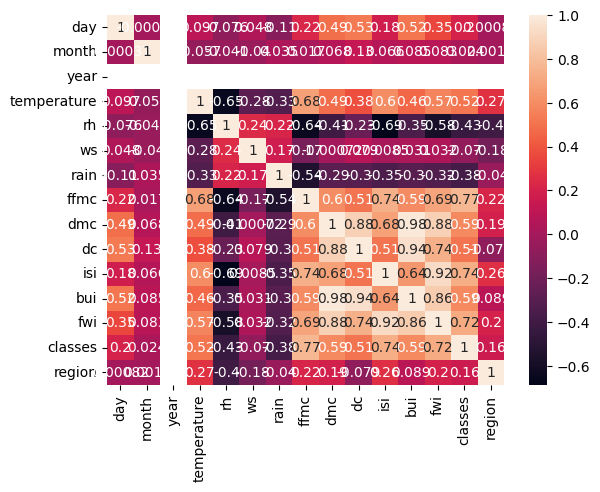

In [26]:
sns.heatmap(df_corr, annot=True)